In [46]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [47]:
import pathlib
data_dir ="/home/selva/Selva/Products/Task/Datas/Images"
data_dir = pathlib.Path(data_dir)

In [48]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1350


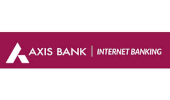

In [49]:
axis_bank = list(data_dir.glob('axis bank/*'))
PIL.Image.open(str(axis_bank[0]))

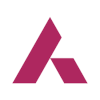

In [50]:
PIL.Image.open(str(axis_bank[1]))


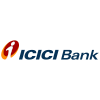

In [51]:
icici_bank = list(data_dir.glob('icici bank/*'))
PIL.Image.open(str(icici_bank[0]))

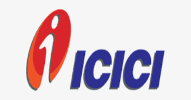

In [52]:
PIL.Image.open(str(icici_bank[1]))


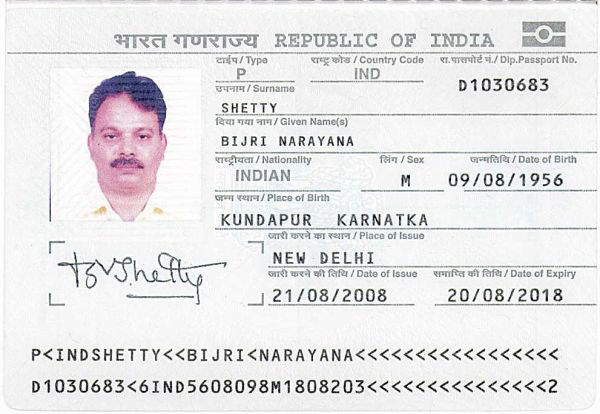

In [53]:
icici_bank = list(data_dir.glob('passport/*'))
PIL.Image.open(str(icici_bank[0]))

In [54]:
batch_size = 32
img_height = 300
img_width = 300

In [55]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1350 files belonging to 9 classes.
Using 1080 files for training.


In [56]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1350 files belonging to 9 classes.
Using 270 files for validation.


In [57]:
class_names = train_ds.class_names
print(class_names)

['aadharcard', 'axis bank', 'icici bank', 'iob bank', 'pancard', 'passport', 'sbi bank', 'standard chartered bank', 'yes bank']


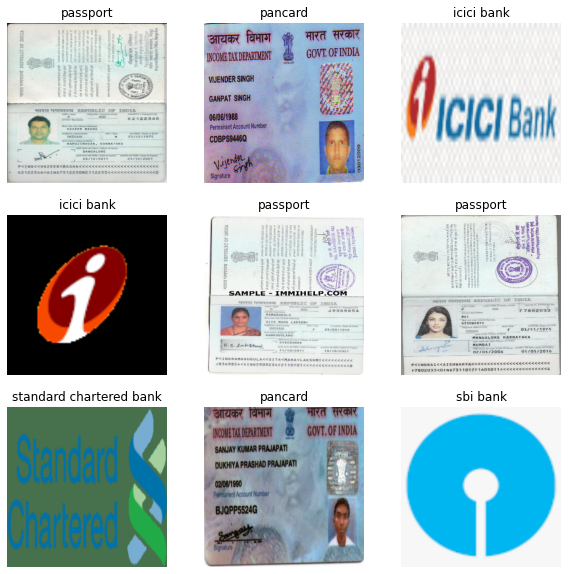

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [59]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


In [60]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [61]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [62]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8454903


In [63]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [65]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
34/34 [==============================] - 26s 765ms/step - loss: 0.8559 - accuracy: 0.7991 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2/10
34/34 [==============================] - 26s 756ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.8872e-04 - val_accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 26s 761ms/step - loss: 7.2924e-05 - accuracy: 1.0000 - val_loss: 4.4613e-05 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 26s 767ms/step - loss: 2.3693e-05 - accuracy: 1.0000 - val_loss: 2.5784e-05 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 26s 768ms/step - loss: 1.6036e-05 - accuracy: 1.0000 - val_loss: 1.9699e-05 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 26s 769ms/step - loss: 1.1696e-05 - accuracy: 1.0000 - val_loss: 1.3838e-05 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 26s 770ms/step - loss: 8.5569e-06 - accuracy: 1.0000 -

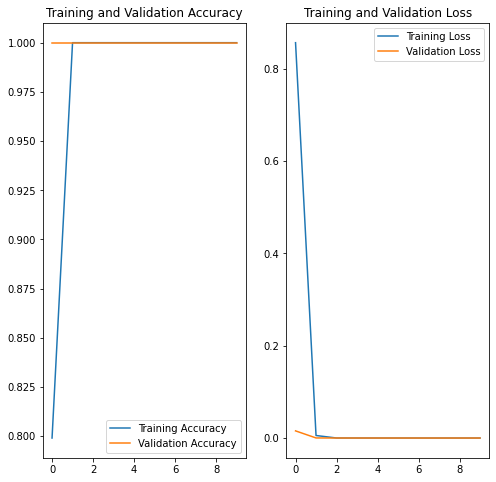

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

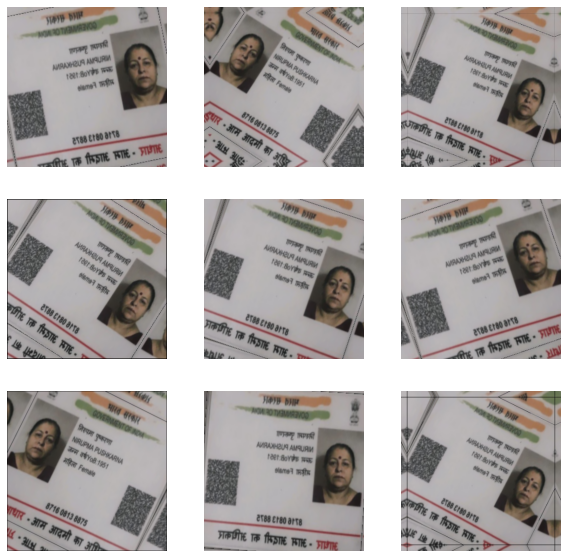

In [68]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [69]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 300, 300, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)       

In [72]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
34/34 [==============================] - 31s 909ms/step - loss: 1.6127 - accuracy: 0.5565 - val_loss: 0.5135 - val_accuracy: 0.8185
Epoch 2/15
34/34 [==============================] - 39s 1s/step - loss: 0.4301 - accuracy: 0.8444 - val_loss: 0.1510 - val_accuracy: 0.9630
Epoch 3/15
34/34 [==============================] - 44s 1s/step - loss: 0.1320 - accuracy: 0.9556 - val_loss: 0.3548 - val_accuracy: 0.9111
Epoch 4/15
34/34 [==============================] - 32s 940ms/step - loss: 0.1584 - accuracy: 0.9611 - val_loss: 0.0562 - val_accuracy: 0.9815
Epoch 5/15
34/34 [==============================] - 32s 949ms/step - loss: 0.0375 - accuracy: 0.9907 - val_loss: 0.0966 - val_accuracy: 0.9593
Epoch 6/15
34/34 [==============================] - 32s 929ms/step - loss: 0.0585 - accuracy: 0.9833 - val_loss: 0.0711 - val_accuracy: 0.9704
Epoch 7/15
34/34 [==============================] - 32s 933ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0436 - val_accuracy: 0.9815
Epoch

In [73]:
model.save('/home/selva/Selva/Products/Task/Datas/model/logomdl3.h5')

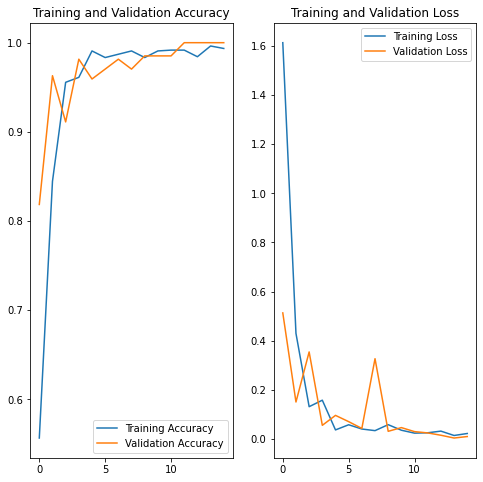

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [75]:
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
sunflower_path='/home/selva/Selva/Products/Task/Datas/sc.jpg'
img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to pancard with a 48.21 percent confidence.


In [78]:
## Model use
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
modelx = load_model('/home/selva/Selva/Products/Task/Datas/model/logomdl3.h5')
import cv2
# class_names=['axis bank', 'icici bank', 'iob bank', 'sbi bank', 'standard chartered bank', 'yes bank']
class_names=['aadharcard', 'axis bank', 'icici bank', 'iob bank', 'pancard', 'passport', 'sbi bank', 'standard chartered bank', 'yes bank']


from keras.models import load_model
from PIL import ImageTk, Image
import numpy as np
import matplotlib.pyplot as plt

file_path=r'/home/selva/Selva/Products/Task/Datas/model/images/sc1.jpg'

testimg=cv2.imread(file_path)

img = keras.preprocessing.image.load_img(
    file_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelx.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

print('The output is',format(class_names[np.argmax(score)]))


The output is pancard


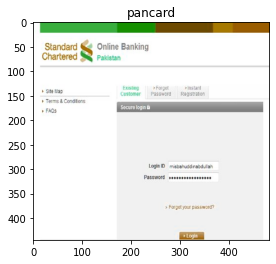

In [79]:
plt.imshow(testimg)
plt.title(str(format(class_names[np.argmax(score)])))
plt.show()
